# Temperature from India Meteorological Department


:::{eval-rst}
:opticon:`tag`
:badge:`copernicus,badge-primary`
:badge:`air-quality,badge-secondary`
:::

[![RoHub - FAIR Executable Research Object](https://img.shields.io/badge/RoHub-FAIR_Executable_Research_Object-2ea44f?logo=Open+Access&logoColor=blue)](https://w3id.org/ro-id/6942229f-fba8-415d-a326-0ae5fd6360da)

<b>This Jupyter notebook is distributed under <a href="https://choosealicense.com/licenses/mit/">MIT License</a></b>


## Background

- IMD High resolution 1By1 degree gridded daily temperature data (1951-2018). 

- This data is arranged in 31x31 grid points. Lat 7.5N, 8.5N ... 36.5, 37.5 (31 Values). Long 67.5E, 68.5E ... 96.5, 97.5 (31 Values).
- For leap years, data for 366 days are included. 
- The unit of temperature is in Celcius.
- Gridded data for the year 2008 and onwards are based on relatively less number of stations (around 180) for which data were received operationaly on real time basis.

### Citation
Should you refer to our product in your paper/presentation, please cite Srivastava et al. A. K. Srivastava, M. Rajeevan, S. R. Kshirsagar : [Development of High Resolution Daily Gridded Temperature Data Set (1969-2005) for the Indian Region](https://www.imdpune.gov.in/Clim_Pred_LRF_New/Research%20paper.pdf). ATMOSPHERIC SCIENCE LETTERS Atmos. Sci. Let. (2009) DOI: 10.1002/asl.232.

## Python packages

In [1]:
pip install imdlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import warnings
import pathlib
import imdlib as imd

In [3]:
warnings.filterwarnings('ignore')

## <a id=2.Data_Management_Plan></a> Data Management Plan

### Organize my data

- Define a prefix for my project (you may need to adjust it for your own usage on your infrastructure).
    - input folder where all the data used as input to my Jupyter Notebook is stored (and eventually shared)
    - output folder where all the results to keep are stored
    - tool folder where all the tools, including this Jupyter Notebook will be copied for sharing
- Create all corresponding folders

In [4]:
WORKDIR_FOLDER = os.path.join(os.environ['HOME'], "datahub/Reliance/Mumbai")
print("WORKDIR FOLDER: ", WORKDIR_FOLDER)

WORKDIR FOLDER:  /home/jovyan/datahub/Reliance/Mumbai


In [5]:
INPUT_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'input')
OUTPUT_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'output')
TOOL_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'tool')

list_folders = [INPUT_DATA_DIR, OUTPUT_DATA_DIR, TOOL_DATA_DIR]

for folder in list_folders:
    pathlib.Path(folder).mkdir(parents=True, exist_ok=True)

## Get gridded observations from India Meteorological service

In [6]:
start_yr = 1951
end_yr = 2018
variable = 'tmax'

In [8]:
try:
  data = imd.open_data(variable, start_yr, end_yr, fn_format = "yearwise", file_dir=INPUT_DATA_DIR)
except:
  data = imd.get_data(variable, start_yr, end_yr, fn_format = "yearwise", file_dir=INPUT_DATA_DIR)

In [9]:
ds = data.get_xarray()

In [10]:
import numpy as np

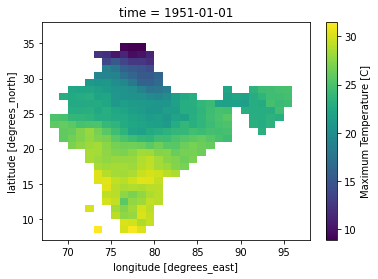

In [11]:
ds[variable].where(ds[variable] <= 99.0).isel(time=0).plot()

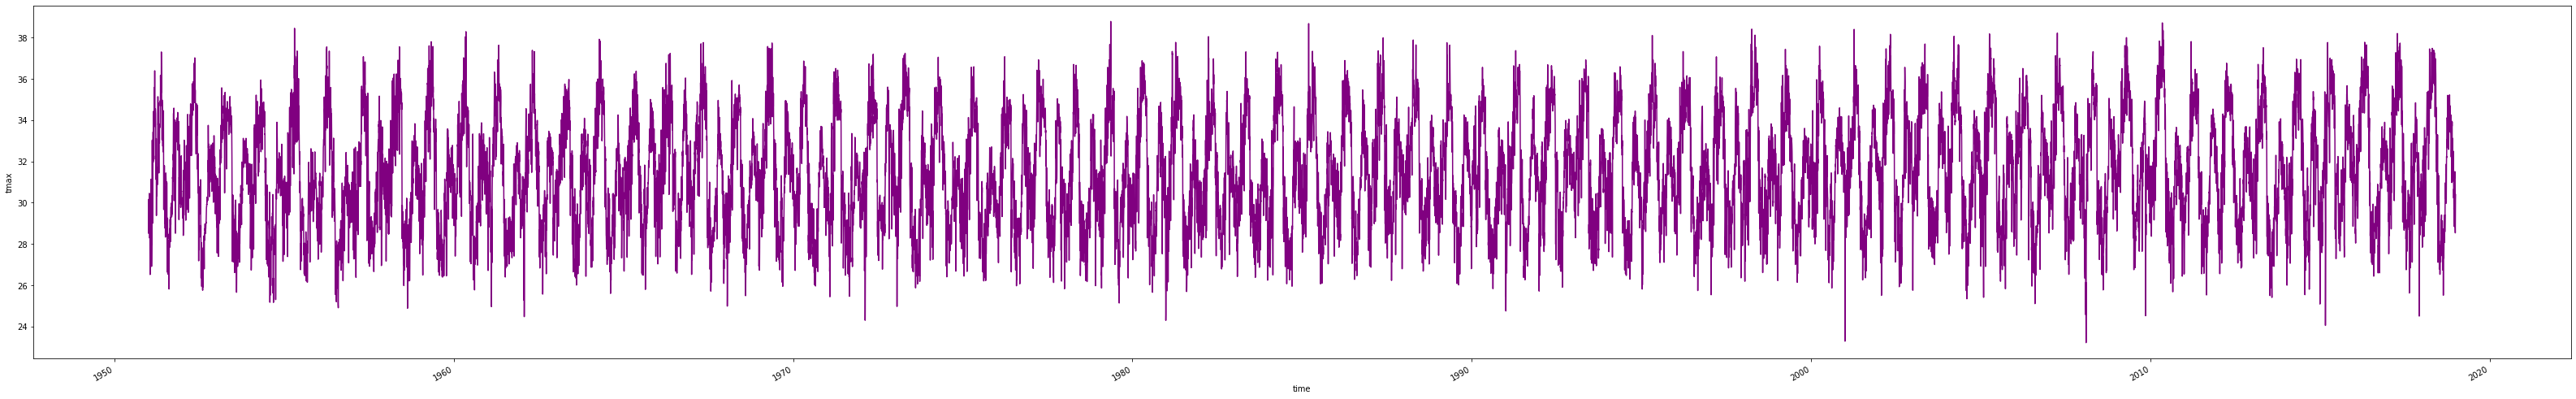

In [12]:
ds_time_series = ds.sel(lat=np.arange(18.75,19.25,0.25), lon=np.arange(72.50, 73.00,0.25),method= "nearest")
ds_time_series=ds_time_series[variable].mean(dim=('lat','lon'))
ds_time_series.plot(color="purple", aspect = 7, size = 8)

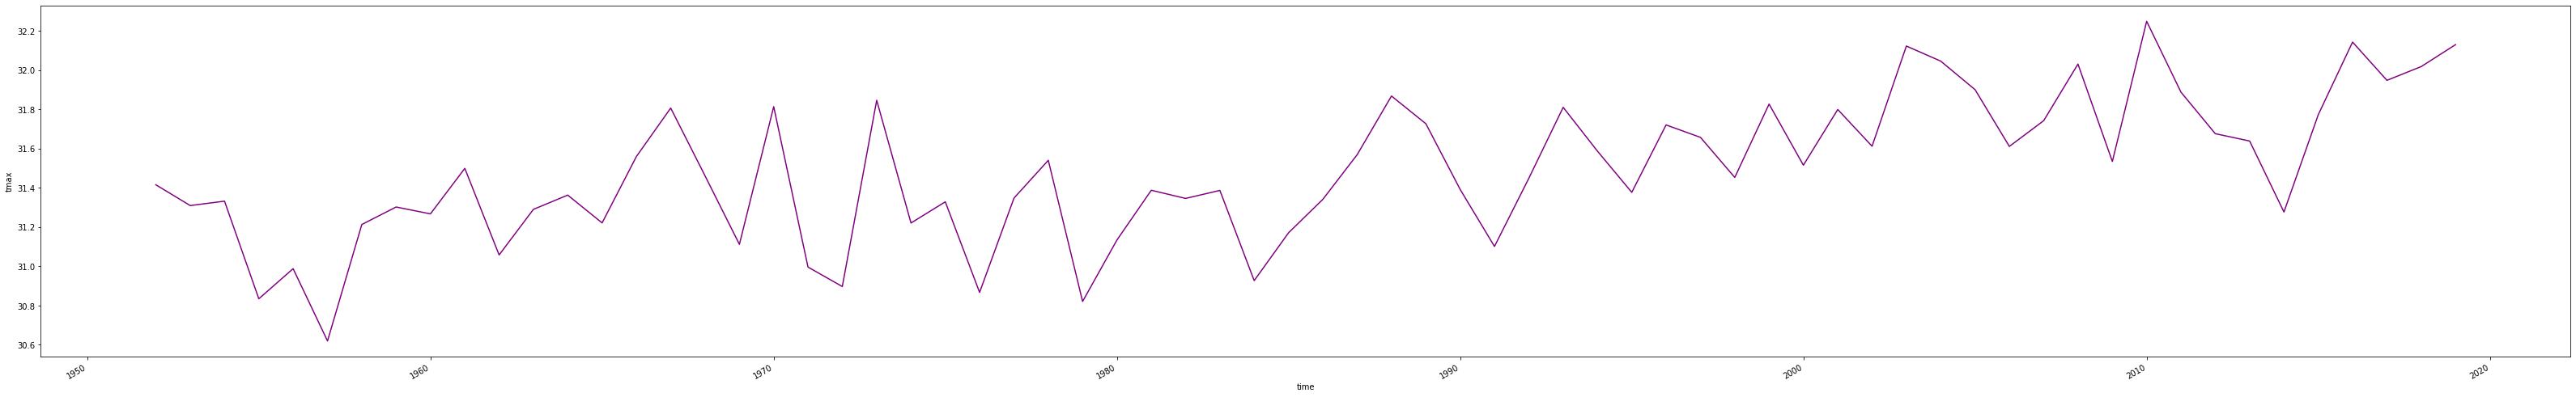

In [13]:
ds_time_series_Y = ds_time_series.resample(time='Y').mean()

ds_time_series_Y.plot(color="purple", aspect = 7, size = 8)

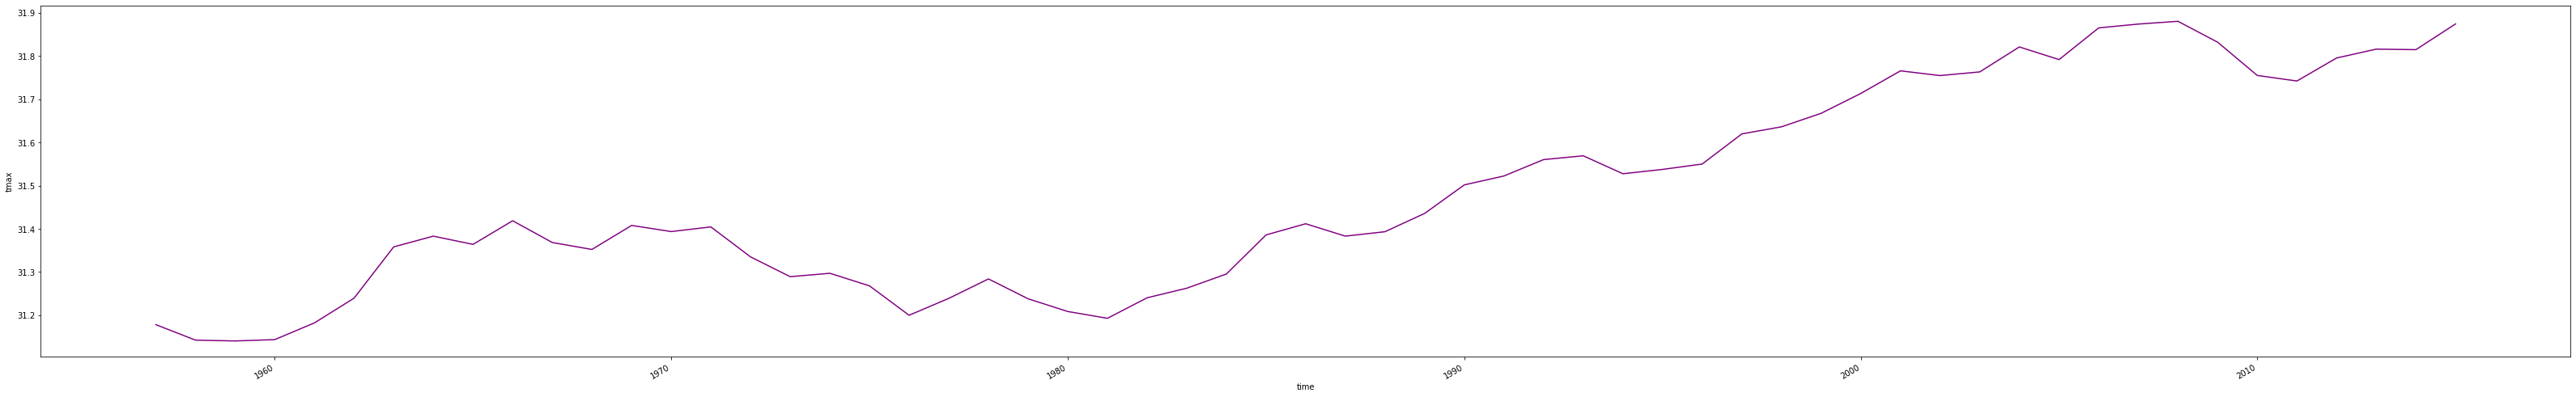

In [14]:
ds_time_series_Y.rolling(time=10, center=True).mean().plot(color="purple", aspect = 7, size = 8)